### Practica 1

__Instrucciones:__

Con la finalidad de explorar las propiedades del modelo lineal vistas en clase, desarrolle las siguientes tareas.

- Genere un modelo lineal que será el modelo subyacente de una población para poder ajustar una regresión. El modelo debe de ser de una sola variable. Grafique este modelo. ✅
- Muestree N datos de la población y grafiquelos en conjunto con el modelo subjacente. No olvide añadir ruido a las muestras. ✅
- Ajuste un modelo lineal para las N muestras utilizando las estimaciones de los parámetros vistas en clase. Grafique el modelo ajustado en conjunto con el modelo de la población.✅
- Compruebe que la suma de los residuales es igual a cero. ✅
- Compruebe que la covarianza entre la característica y los residuales es igual a cero. ✅
- Pruebe que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado. Grafíquelos.✅

In [58]:
import numpy as np
import matplotlib.pyplot as plt

### Modelo lineal

In [59]:
def generar_modelo():
    m = np.random.normal(0, 1)
    b = np.random.normal(0, 1)
    return [m, b]

modelo lineal simple con coeficientes de pendiente e intersección en el eje Y generados de manera aleatoria utilizando la distribución normal estándar, y luego devuelve estos parámetros en una lista.

In [60]:
def modelo_lineal(m, b, x):
    return m * x + b
   

función para calcular el valor de \( y \) para el modelo lineal dado los valores de \( m \), \( b \), y \( x \) utilizando la fórmula de la línea recta.

In [61]:
N = 5
min_x = 0
max_x = 21

In [62]:
m, b = generar_modelo()
x = np.linspace(min_x, max_x, N)
lm = modelo_lineal(m, b, x)

modelo lineal aleatorio con m y b, crea un conjunto de valores de entrada x, y calcula los valores de salida lm basados en ese modelo lineal.

##### Crear poblacion

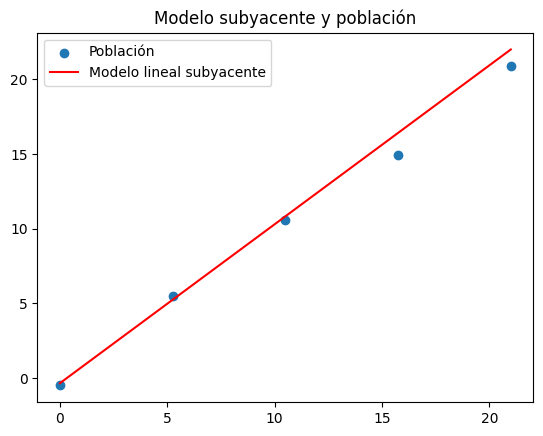

In [63]:
y = lm + np.random.normal(0, 1, N)
plt.scatter(x, y, label="Población")
plt.plot(x, lm, label="Modelo lineal subyacente", color="red")
plt.legend()
plt.title("Modelo subyacente y población")
plt.show()

#### Sampling

Gráfico de dispersión de 200 puntos de datos seleccionados aleatoriamente de las variables x e y.

In [64]:
n_muestra = 200
idx_x_muestra = np.random.randint(0, N, n_muestra)
x_muestra = x[idx_x_muestra]
y_muestra = y[idx_x_muestra]


Aquí se crea un nuevo array x_muestra y y_muestra que contiene las muestras de x seleccionadas usando los índices aleatorios generados en el paso anterior.

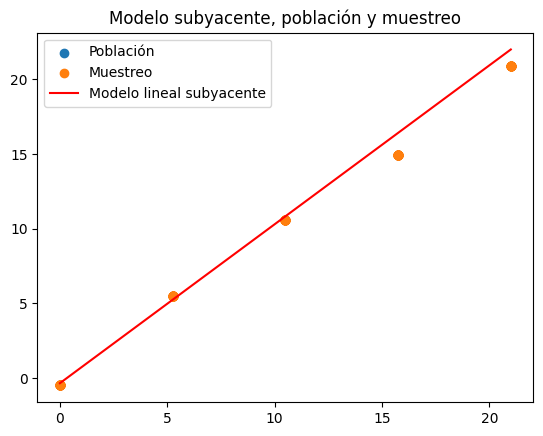

In [65]:
plt.scatter(x, y, label="Población")
plt.scatter(x_muestra, y_muestra, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="red")
plt.legend()
plt.title("Modelo subyacente, población y muestreo")
plt.show()


In [66]:
def ajuste_lineal_modelo(X, y):
    m_ajustado = np.cov(X, y)[0, 1] / np.var(X)
    b_ajustado = np.mean(y) - m_ajustado * np.mean(X)
    return [m_ajustado, b_ajustado]

Esta función realiza un ajuste lineal a los datos de entrada y salida  y devuelve los coeficientes de pendiente e intersección que mejor se ajustan a esos datos.

In [67]:
# Crear un arreglo de numeros 1
unos_arreglo = np.ones(len(x_muestra))
A = np.vstack([x_muestra, unos_arreglo]).T
m_ajustado, c_ajustado = np.linalg.lstsq(A, y_muestra)[0]
print(m_ajustado, c_ajustado)

0.9916700067396274 -0.16720452479486764


/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_39714/1366364514.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_ajustado, c_ajustado = np.linalg.lstsq(A, y_muestra)[0]


In [68]:
m_adj_1, b_adj_1 = ajuste_lineal_modelo(x_muestra, y_muestra)
print(m_adj_1, b_adj_1)

0.9966532731051535 -0.21769747124356087


Impresión del modelo lineal poblacional. 

In [69]:
print(m, b)

1.0644385121473403 -0.347623414103453


In [70]:
# Primera Implementación.
lm_adj = modelo_lineal(m_ajustado, c_ajustado, x)
# Segunda Implementacón.
lm_adj_1 = modelo_lineal(m_adj_1, b_adj_1, x)

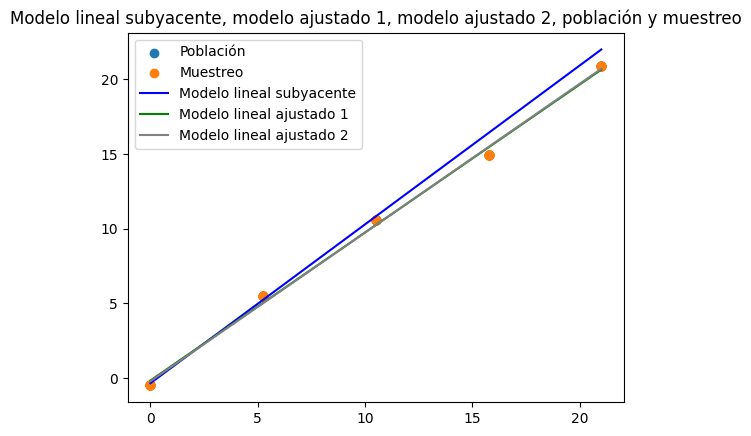

In [71]:
# Gráfica de modelo subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo
plt.scatter(x, y, label="Población")
plt.scatter(x_muestra, y_muestra, label="Muestreo")
plt.plot(x, lm, label="Modelo lineal subyacente", color="blue")
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="green")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="gray")
plt.legend()
plt.title("Modelo lineal subyacente, modelo ajustado 1, modelo ajustado 2, población y muestreo")
plt.show()

In [72]:
# Residuos Modelo Lineal 1.
y_adjusted = lm_adj[idx_x_muestra]
resids = y_muestra - y_adjusted

# Residuos Modelo Lineal 2.
y_adjusted_1 = lm_adj_1[idx_x_muestra]
resids_1 = y_muestra - y_adjusted_1

Verifica que la suma de los residuales es igual a cero.

In [73]:
# Modelo Lineal 1.
assert np.isclose(np.sum(resids), 0), 'Error: La suma de los residuales de la implementación 1 no se acerca a cero'
# Modelo Lineal 2.
assert np.isclose(np.sum(resids_1), 0), 'Error: La suma de los residuales de la implementación 2 no se acerca a cero'

Verifica que la covarianza entre la característica y los residuales es igual a cero

In [74]:
# Modelo Lineal 1.
cov = np.cov(x_muestra, resids)[0, 1]
assert np.isclose(cov, 0), 'Error: La covarianza de la implementación 1 no se acerca a cero, cov' + str(cov)

# Modelo Lineal 2.
cov_1 = np.cov(x_muestra, resids_1)[0, 1]
assert np.isclose(cov_1, 0, atol=5e-1), 'Error: La covarianza de la implementación 2 no se acerca a cero, cov: ' + str(cov_1)

In [75]:
# Prueba que la media de la característica y la media de los valores objetivo está sobre la recta del modelo lineal ajustado.
media_x_sample = np.mean(x_muestra)
media_y_sample = np.mean(y_muestra)

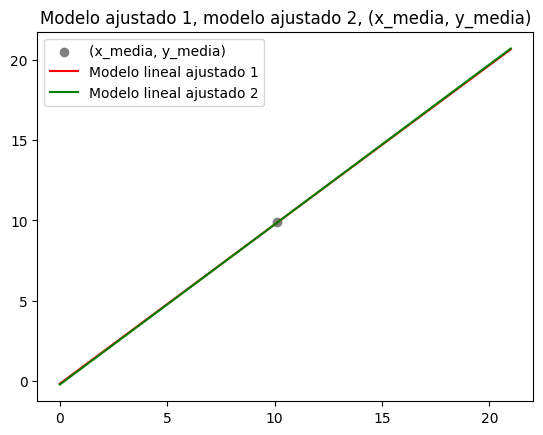

In [76]:
# Gráfica del modelo ajustado 1, modelo ajustado 2, (x_media, y_media)
plt.scatter(media_x_sample, media_y_sample, label="(x_media, y_media)", color='grey')
plt.plot(x, lm_adj, label="Modelo lineal ajustado 1", color="red")
plt.plot(x, lm_adj_1, label="Modelo lineal ajustado 2", color="green")
plt.legend()
plt.title("Modelo ajustado 1, modelo ajustado 2, (x_media, y_media)")
plt.show()

Varianza para ols

Encontrar la varianza entre los esrimadores (b0,b1)

Despúes de ajustar los 200 valores, ¿como calculo la varianza?

Calcular la variana de Bo y b1



var #eje 0

n es igual al tamañao de la muestra

(Estamos trabajando en el rango de 1000)

Muestreo de la poblacion en 5 subir luego a 10

n = 10 


x = (popSample) (varianza_ruido_blanco) (10,1 el valor que elijamos)

for 1000:
    x sample ( ruido, s o2)
